<a href="https://colab.research.google.com/github/Amith07220/Sentimental-Analysis/blob/main/Assignment_4_C0937030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**TASK 1: Loading and Exploring the Dataset:**

In [2]:
import pandas as pd

# Load dataset from GitHub
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
df = pd.read_csv(url)

# Show the first few rows
df.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
# Imporing  required libraries

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score




In [6]:
# Check for missing values
print("Missing values in each column:\n")
print(df.isnull().sum())


Missing values in each column:

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64


In [7]:
# Summary statistics
df.describe()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


**TASK 2: Simple Linear Aggression:**

In [11]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define predictor and target
X = df[['rm']]
y = df['medv']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
lr_simple = LinearRegression()
lr_simple.fit(X_train, y_train)

# Predict
y_pred_simple = lr_simple.predict(X_test)


**TASK 3: Multiple Linear Regression using top features:**

In [12]:

# Get top 5 most correlated features with 'medv'
corr = df.corr()['medv'].abs().sort_values(ascending=False)
top5_features = corr.index[1:6]  # exclude 'medv' itself
print("Top 5 correlated features:", list(top5_features))

# Define X and y
X_multi = df[top5_features]
y_multi = df['medv']

# Train-test split
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

# Train model
lr_multi = LinearRegression()
lr_multi.fit(X_train_m, y_train_m)

# Predict
y_pred_multi = lr_multi.predict(X_test_m)


Top 5 correlated features: ['lstat', 'rm', 'ptratio', 'indus', 'tax']


**TASK 4: Evaluating Model Performance using R2, MAE, RMSE**

In [13]:

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

print("Simple Linear Regression Evaluation:")
print("R² Score:", r2_score(y_test, y_pred_simple))
print("MAE:", mean_absolute_error(y_test, y_pred_simple))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_simple)))

print("\nMultiple Linear Regression Evaluation:")
print("R² Score:", r2_score(y_test_m, y_pred_multi))
print("MAE:", mean_absolute_error(y_test_m, y_pred_multi))
print("RMSE:", np.sqrt(mean_squared_error(y_test_m, y_pred_multi)))


Simple Linear Regression Evaluation:
R² Score: 0.3707569232254778
MAE: 4.478335832064149
RMSE: 6.792994578778734

Multiple Linear Regression Evaluation:
R² Score: 0.6196683547405641
MAE: 3.3357265551811968
RMSE: 5.281208043853636


**TASK 5: Actual VS Predicated and Residual Values**

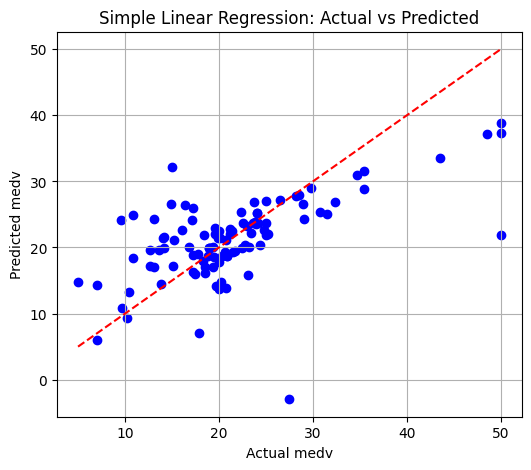

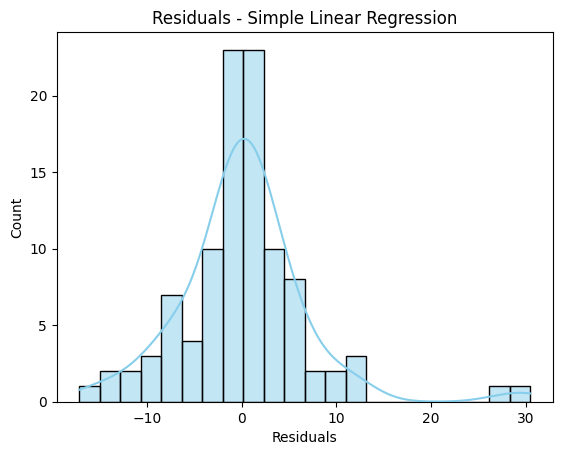

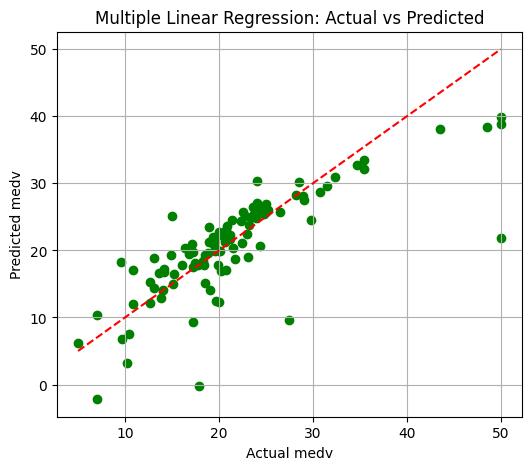

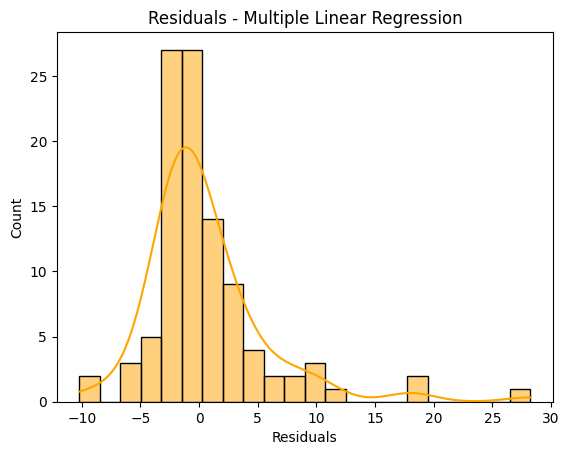

In [14]:
# TASK 5: Plot predicted vs actual values and residuals

# --- Simple Linear Regression ---
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred_simple, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title("Simple Linear Regression: Actual vs Predicted")
plt.xlabel("Actual medv")
plt.ylabel("Predicted medv")
plt.grid(True)
plt.show()

sns.histplot(y_test - y_pred_simple, kde=True, color='skyblue')
plt.title("Residuals - Simple Linear Regression")
plt.xlabel("Residuals")
plt.show()

# --- Multiple Linear Regression ---
plt.figure(figsize=(6, 5))
plt.scatter(y_test_m, y_pred_multi, color='green')
plt.plot([y_test_m.min(), y_test_m.max()], [y_test_m.min(), y_test_m.max()], 'r--')
plt.title("Multiple Linear Regression: Actual vs Predicted")
plt.xlabel("Actual medv")
plt.ylabel("Predicted medv")
plt.grid(True)
plt.show()

sns.histplot(y_test_m - y_pred_multi, kde=True, color='orange')
plt.title("Residuals - Multiple Linear Regression")
plt.xlabel("Residuals")
plt.show()
